# Exploratory Data Analysis

# Netflix EDA
Performing Exploratory Data Analysis To Understand Dataset

In [31]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [36]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\Netflix Data\netflix_titles.csv')

In [39]:
data.head(2) 
# Shows us First Five Details Of Dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [44]:
data.shape
# Shows Us All Rows And Column.

(8807, 12)

In [45]:
data.describe() 
# Collect All Intger And Float Details.

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [46]:
data.info()
# Shows Us All Data type And Count Our Column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Missing Value

In [48]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Adjust Data Type And Fill In Missing Values

# The following do not required any field

type
title
release_year
listed_in
description

# The Following are Missing Data

Update date_added to datetime and check

In [60]:
# Convert the data type from object to datetime64
data['date_added'] = pd.to_datetime(data['date_added'])

In [61]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Handling Missing Value


In [67]:
data.fillna({'rating': 'Unavailable', 'cast': 'Unavailable', 'country': 'Unavailable', 'director': 'Unavailable', 'duration': 'Unavailable'}, inplace=True)
data.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

For null in date_added, missing_date_added is to be subsitude in with the most recent date from date_added \This is because Netflix has the tendency to and more content over time\\ Other viable option would be finding actuall dates and inputting them manually or dropping the data from results since the amount of missing data is rather small.

In [70]:
# This is that values where our date added column values are showing null.
data[data.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [79]:
most_recent_entry_date=data['date_added'].max()
data.fillna({'date_added': most_recent_entry_date}, inplace=True)

Proof of concept that the date filled in the null date_added from a show_id exampel that previously was missing the date_added

In [80]:
# Here what we did whatever we wnat to see our show_id that we picked it and place and it shows the result that is totally changed.
data[data.show_id == 's6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


# Additional Data Cleaning

Duration data input error



In [92]:
data[data.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [93]:
data[data.director == 'Loois C K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [94]:
# No output we get here because we already remove the values previous

# Visualization

Lets take a look at type of shows tat has been watched on Netflix

In [95]:
# Value count method shows the count of diffrent categories in a given column.
data.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Count vs Type Of Shows ')

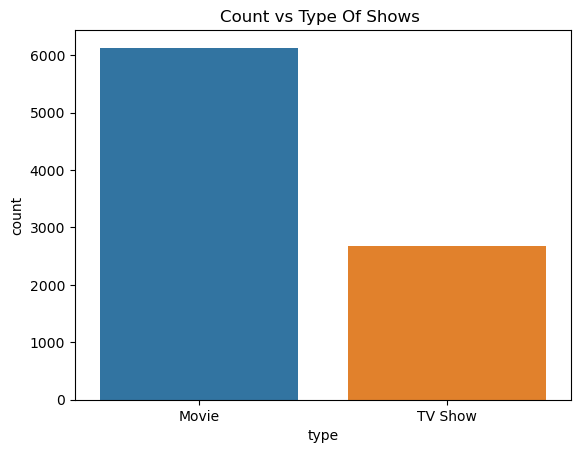

In [99]:
# Countplot helps us to plots counts of each catagory
sns.countplot(x = 'type' , data = data)
plt.title('Count vs Type Of Shows ')

On Netflix there are more numbers of movies than shows

# Country Analysis

In [100]:
data['country'].value_counts().head(10)

United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

Text(0.5, 1.0, 'Country Wise Content On Netflix')

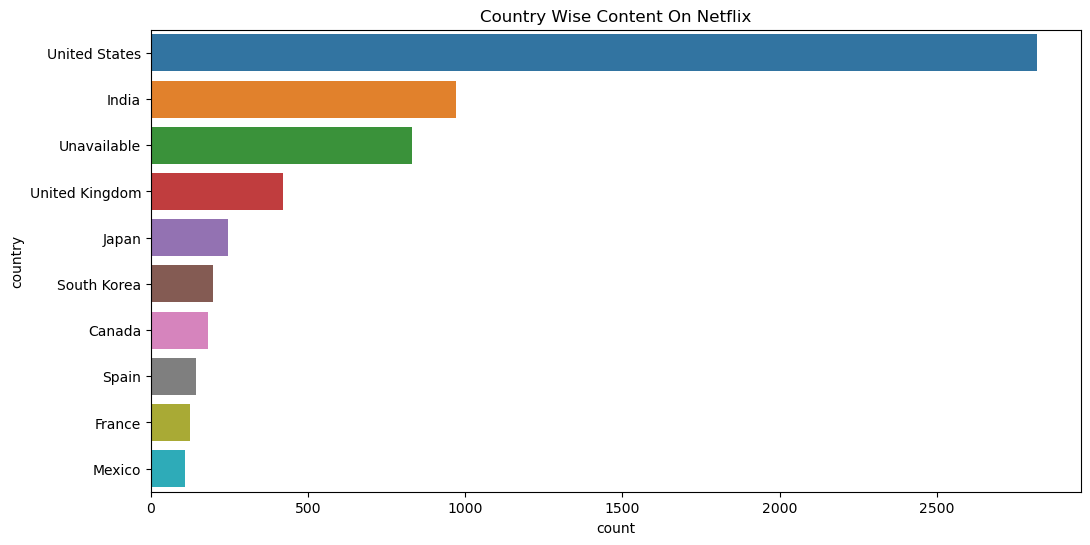

In [101]:
plt.figure(figsize = (12,6))
sns.countplot(y = 'country',order = data['country'].value_counts().index[0:10],data = data)
plt.title('Country Wise Content On Netflix')

In [103]:
# Now we wil check types of content based on country
movie_countries = data[data['type'] == 'Movie']
tv_show_countries = data[data['type'] == 'TV Show']

Text(0.5, 1.0, 'Top 10 Countries Producing Tv Shows In Netflix')

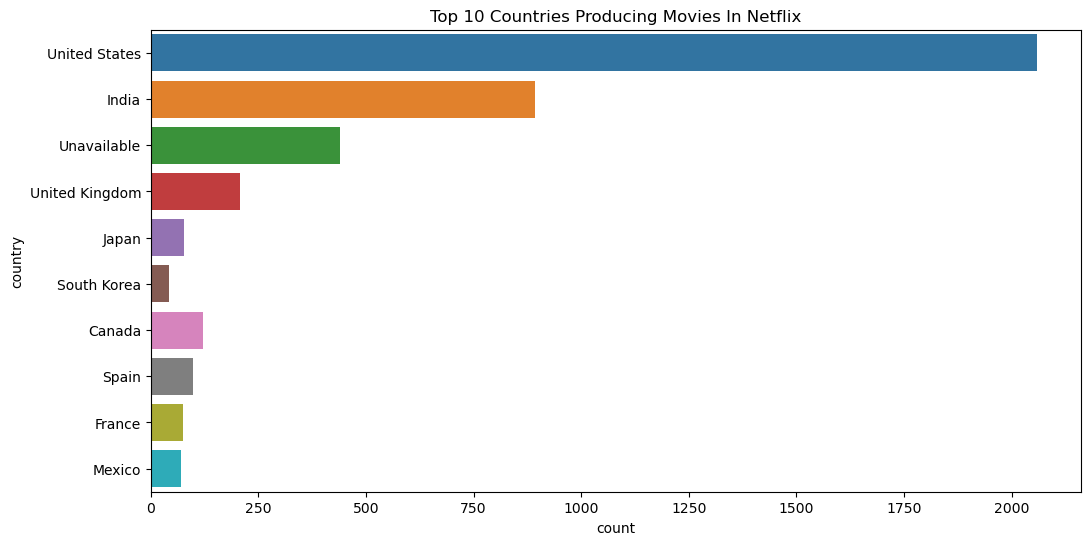

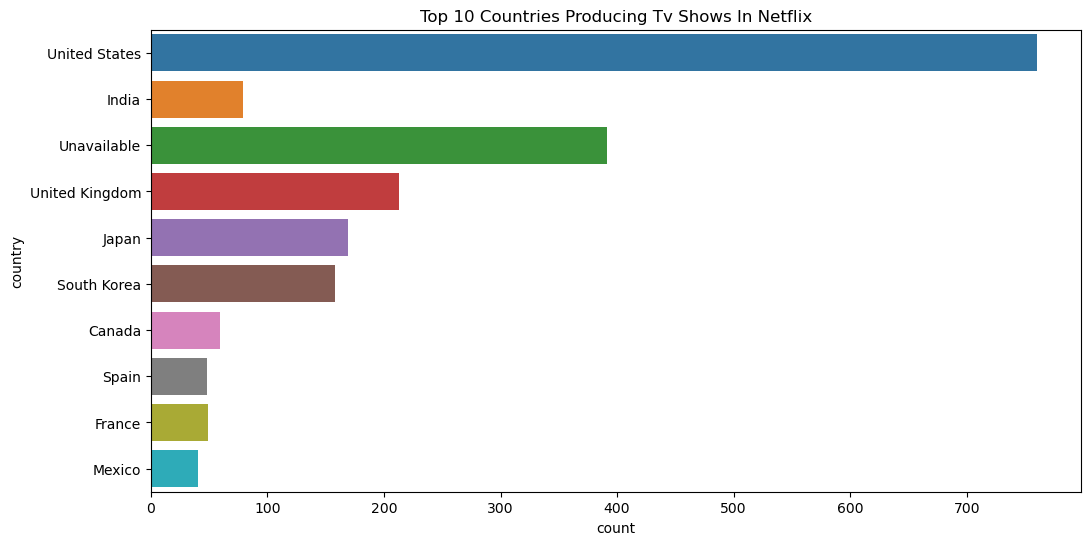

In [107]:
plt.figure(figsize = (12,6))
sns.countplot(y='country', order = data['country'].value_counts().index[0:10],data = movie_countries)
plt.title('Top 10 Countries Producing Movies In Netflix')
              

plt.figure(figsize = (12,6))
sns.countplot(y='country', order = data['country'].value_counts().index[0:10],data = tv_show_countries)
plt.title('Top 10 Countries Producing Tv Shows In Netflix')

Lets check what are the major rating given to Netlix show

In [109]:
data.rating.value_counts()

TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
TV-Y7-FV          6
Unavailable       4
NC-17             3
UR                3
74 min            1
84 min            1
66 min            1
Name: rating, dtype: int64

Text(0.5, 1.0, 'Rating Of Shows On Netflix Vs Counts')

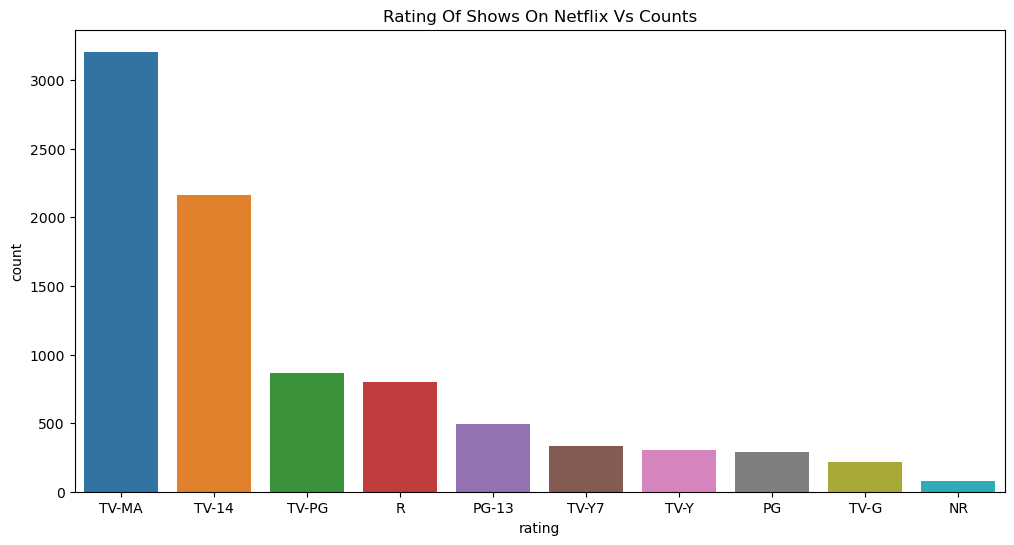

In [112]:
plt.figure(figsize = (12,6))
sns.countplot(x='rating', order = data['rating'].value_counts().index[0:10],data = data)
plt.title('Rating Of Shows On Netflix Vs Counts')


In [114]:
data.release_year.value_counts()[:20]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Content Release In Years On Netflix Vs Count')

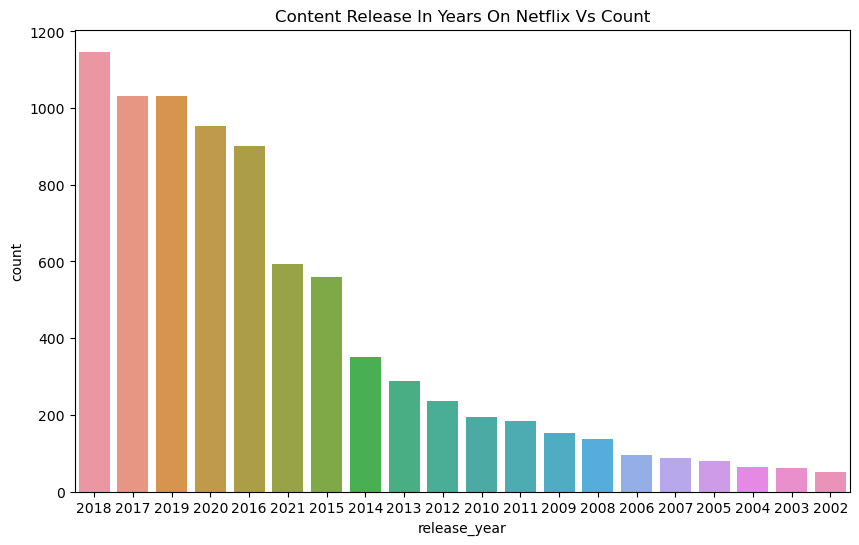

In [118]:
plt.figure(figsize = (10,6))
sns.countplot(x='release_year', order = data['release_year'].value_counts().index[0:20],data = data)
plt.title('Content Release In Years On Netflix Vs Count')

# Popular Genres Analysis

Text(0.5, 1.0, 'Top 20 Genres On Netflix')

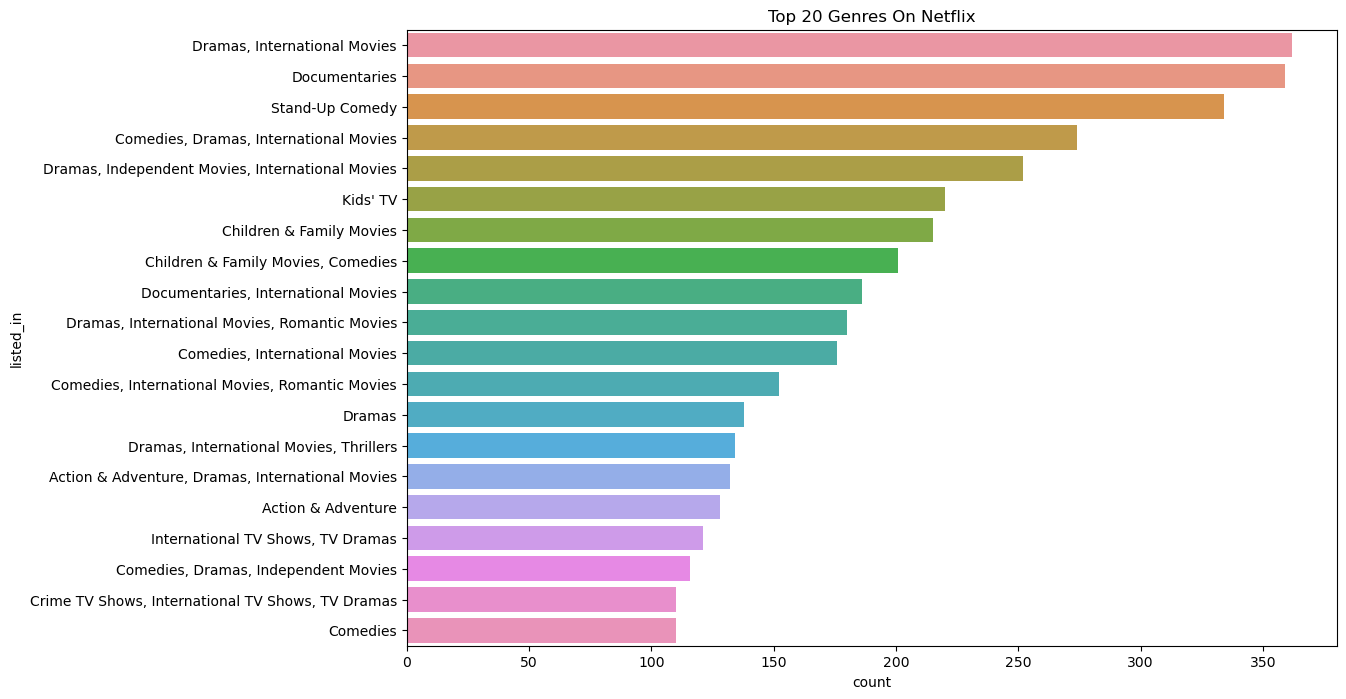

In [123]:
plt.figure(figsize = (12,8))
sns.countplot(y='listed_in',order = data['listed_in'].value_counts().index[0:20],data = data)
plt.title('Top 20 Genres On Netflix')

# Summary

So far, we had performed lots of operations over to dataset to dg out some very useful information from it. If, we have to conclude the dataset in the fwe line, than we can say that.

- Netflix has more Movies than Tv shows
* Most numbers of movies and Tv shows are produced by untitled states, followed by India who has produced the second most numbers of movies on Netflix.
- Most of the content on Netflix (Movies an Tv shows combined) is for mature audiance.
* 2018 is the year in which Netflix released alot more content as compared to other years.
- International Movies and Dramas are the most popular Genres on Netflix.





# Thank You